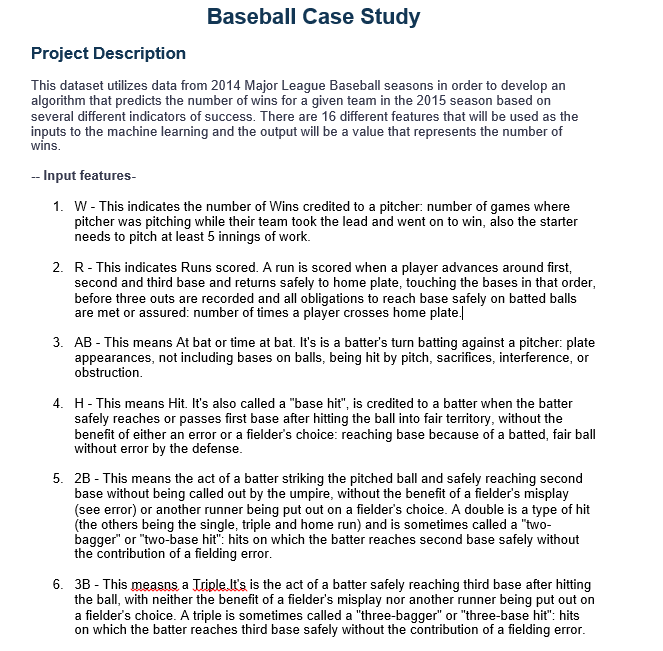
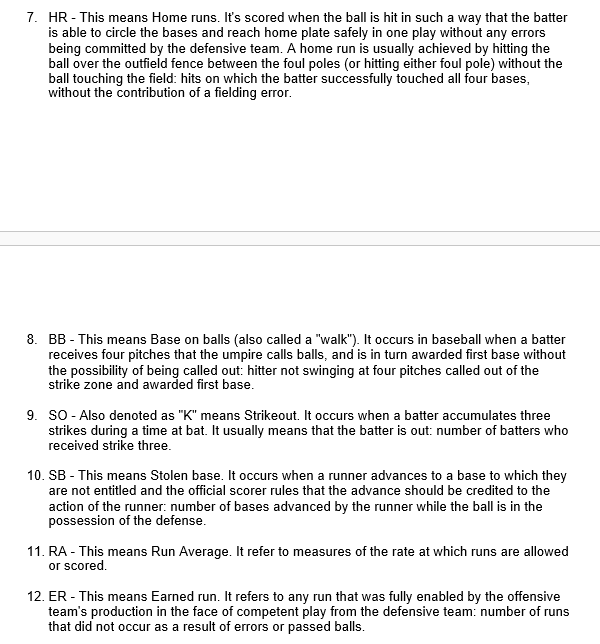
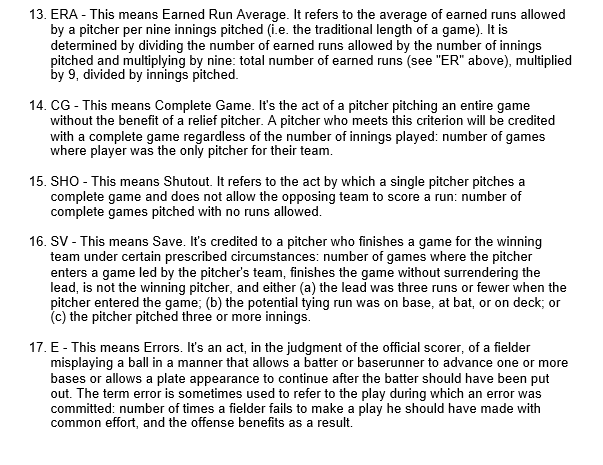
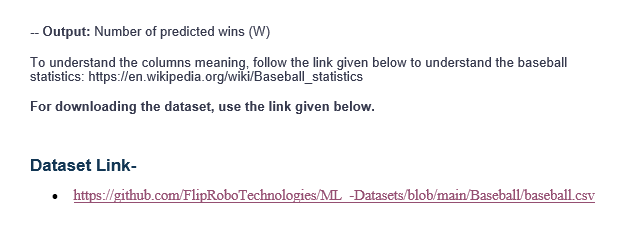
Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Baseball/baseball.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

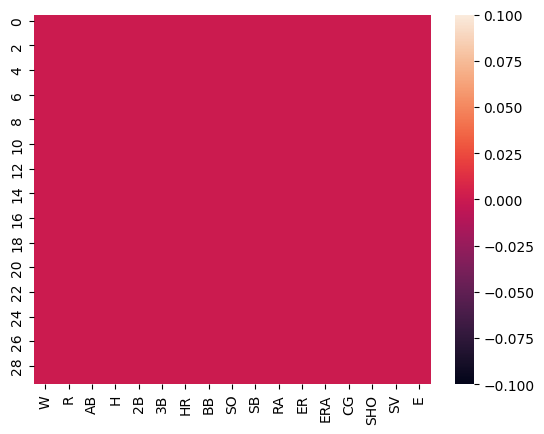

In [8]:
# lets check null value with heatmap

sns.heatmap(df.isnull())

In [13]:
# count value of each column 

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

W
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: count, dtype: int64


R
689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: count, dtype: int64


AB
5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: count, dtype: int64


H
1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1

In [14]:
# checking number of unique values in each coulmn

df.nunique().to_frame('No of unique valeue')


No of unique valeue
W                     24
R                     28
AB                    29
H                     29
2B                    22
3B                    23
HR                    27
BB                    29
SO                    29
SB                    27
RA                    30
ER                    30
ERA                   30
CG                     9
SHO                   12
SV                    20
E                     21

#### Visualization 

In [22]:
plt.figure(figsize=(100,150))

p=1       
for i in df.columns:
    if p<=17:
        ax=plt.subplot(3,6,p)
        df[i].value_counts().plot(kind='bar', ax=ax)
        plt.title(f"Distribution of {i}",fontsize=15)
        plt.xlabel(df[i], fontsize=20)
        plt.ylabel('Count')
        
        p+=1
plt.tight_layout()
plt.show()
        
    

In [ ]:
# check how the data distribtuted 

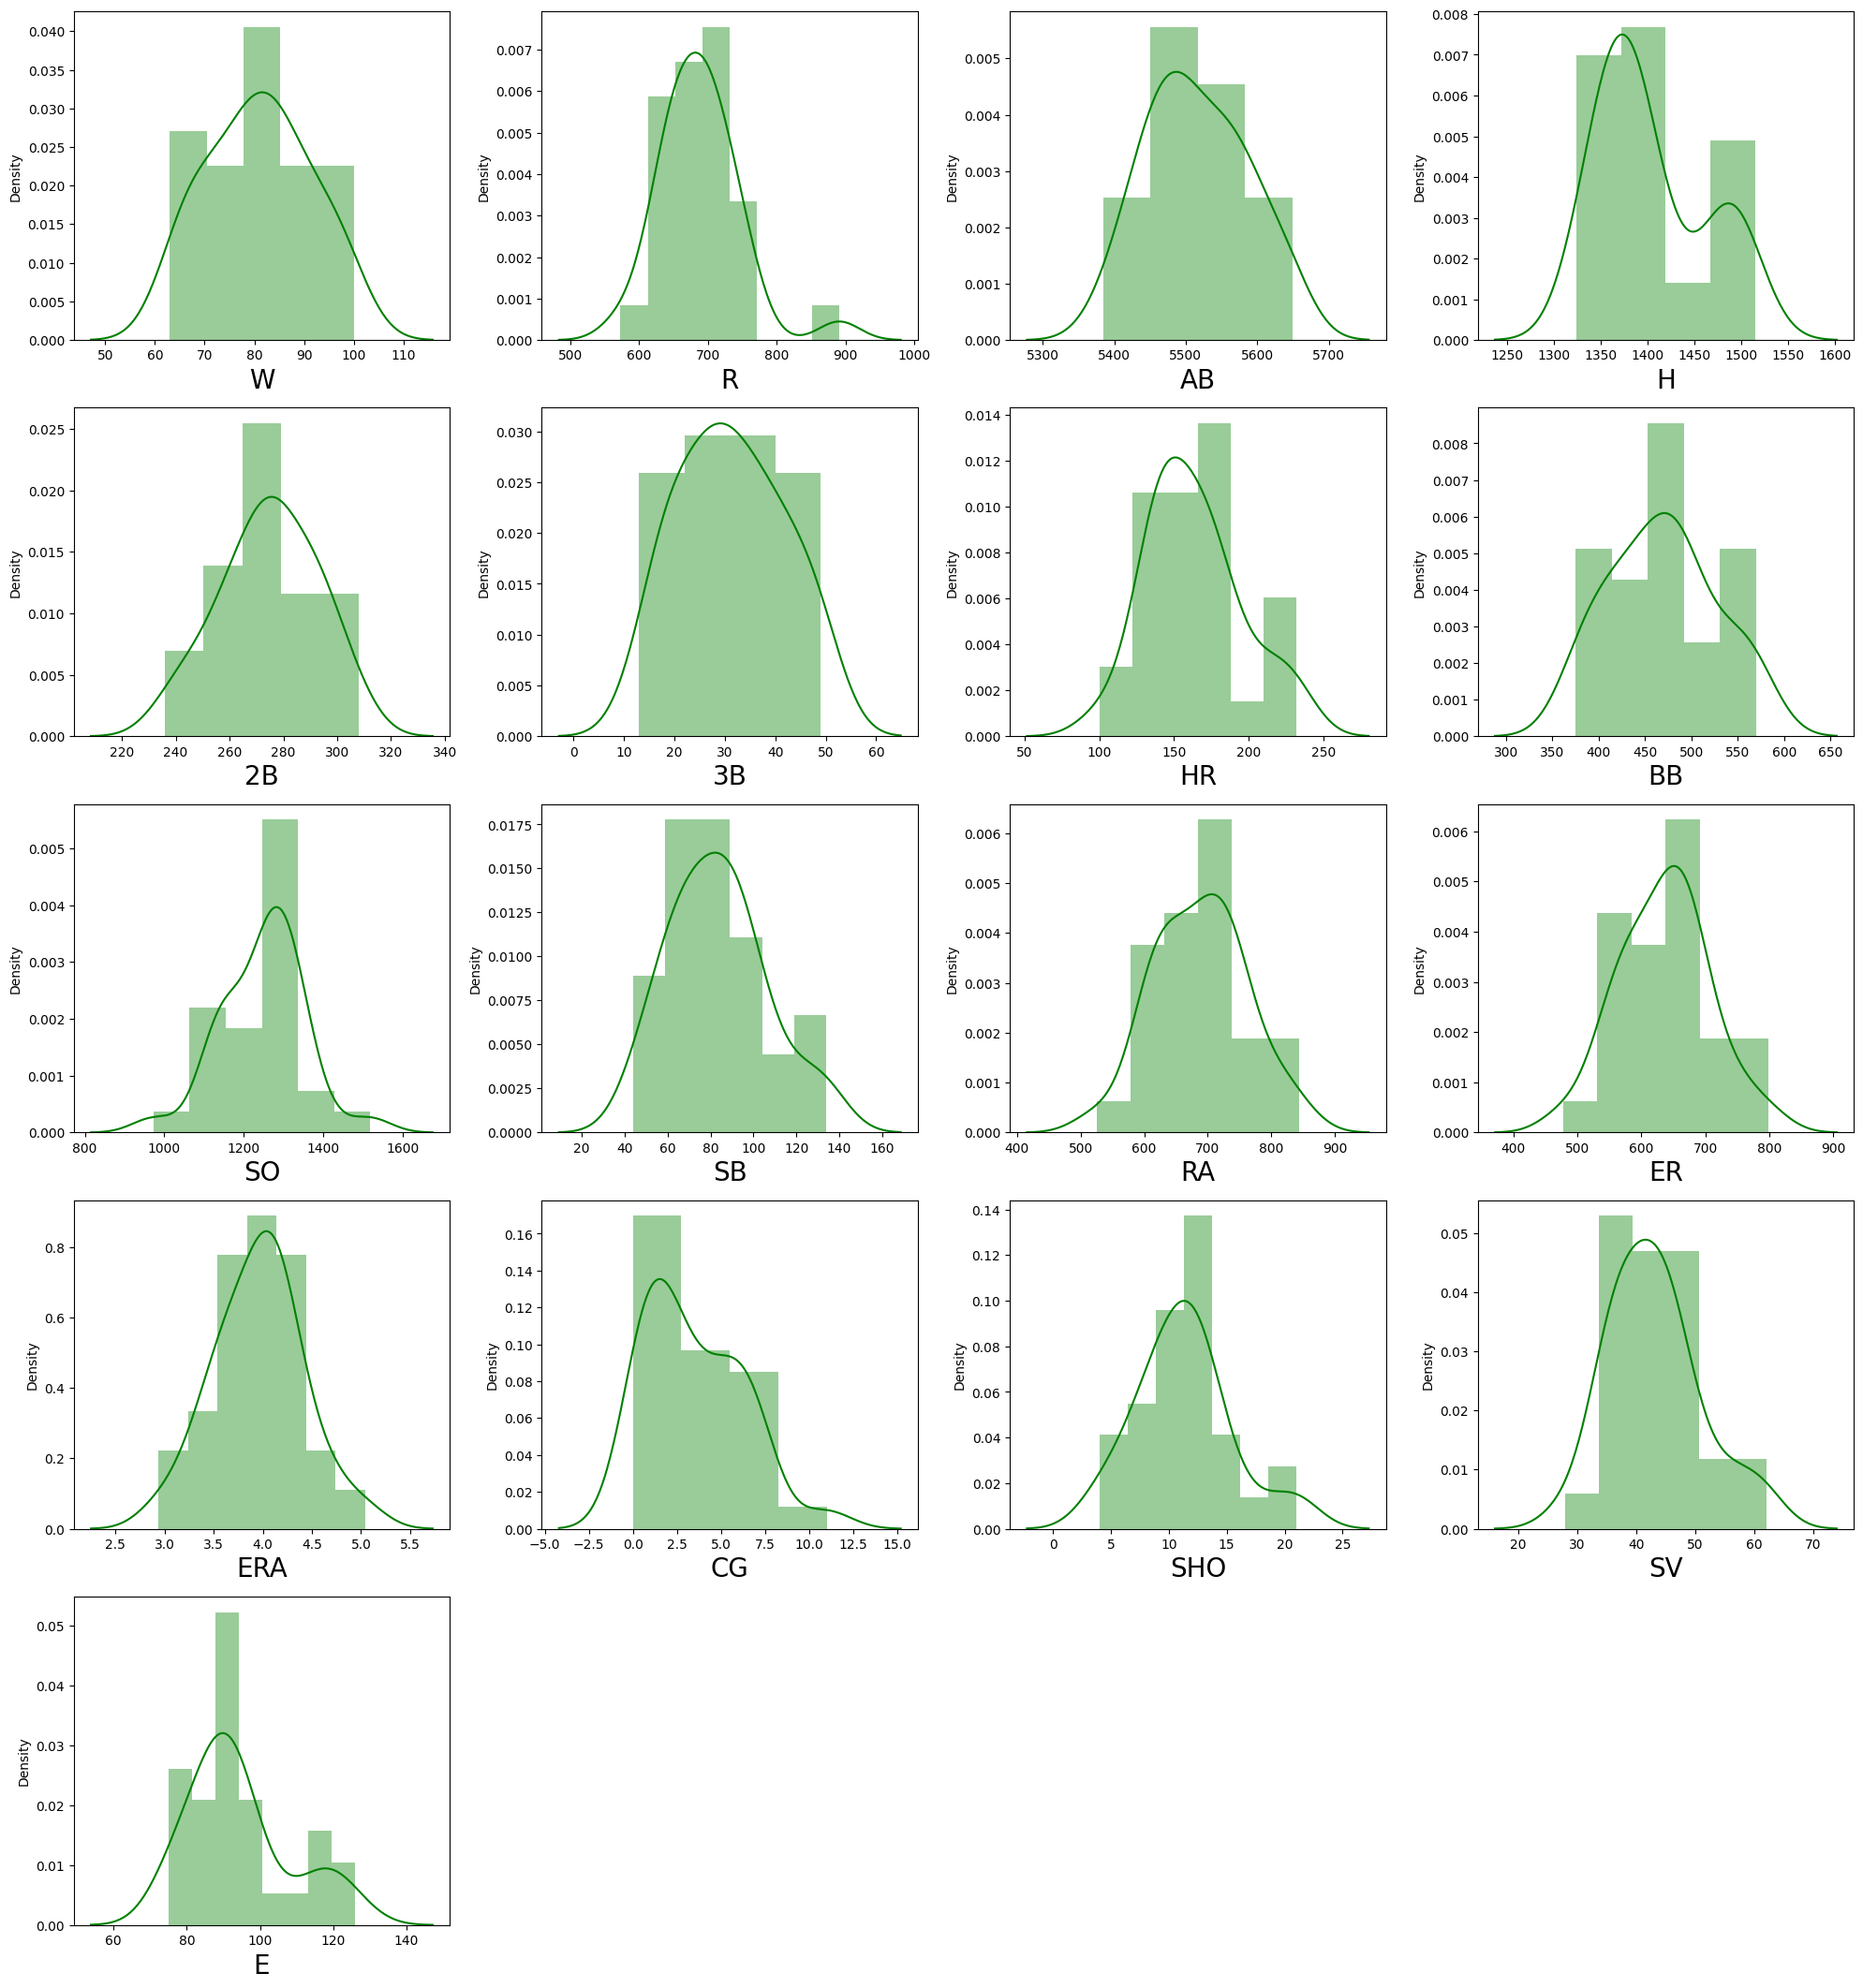

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
p=1

for col in df:
    
    if p<=17:
        axs=plt.subplot(6,4,p)
        sns.distplot(df[col],color='green')
        plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()
plt.show()

In [ ]:
# checking outliars

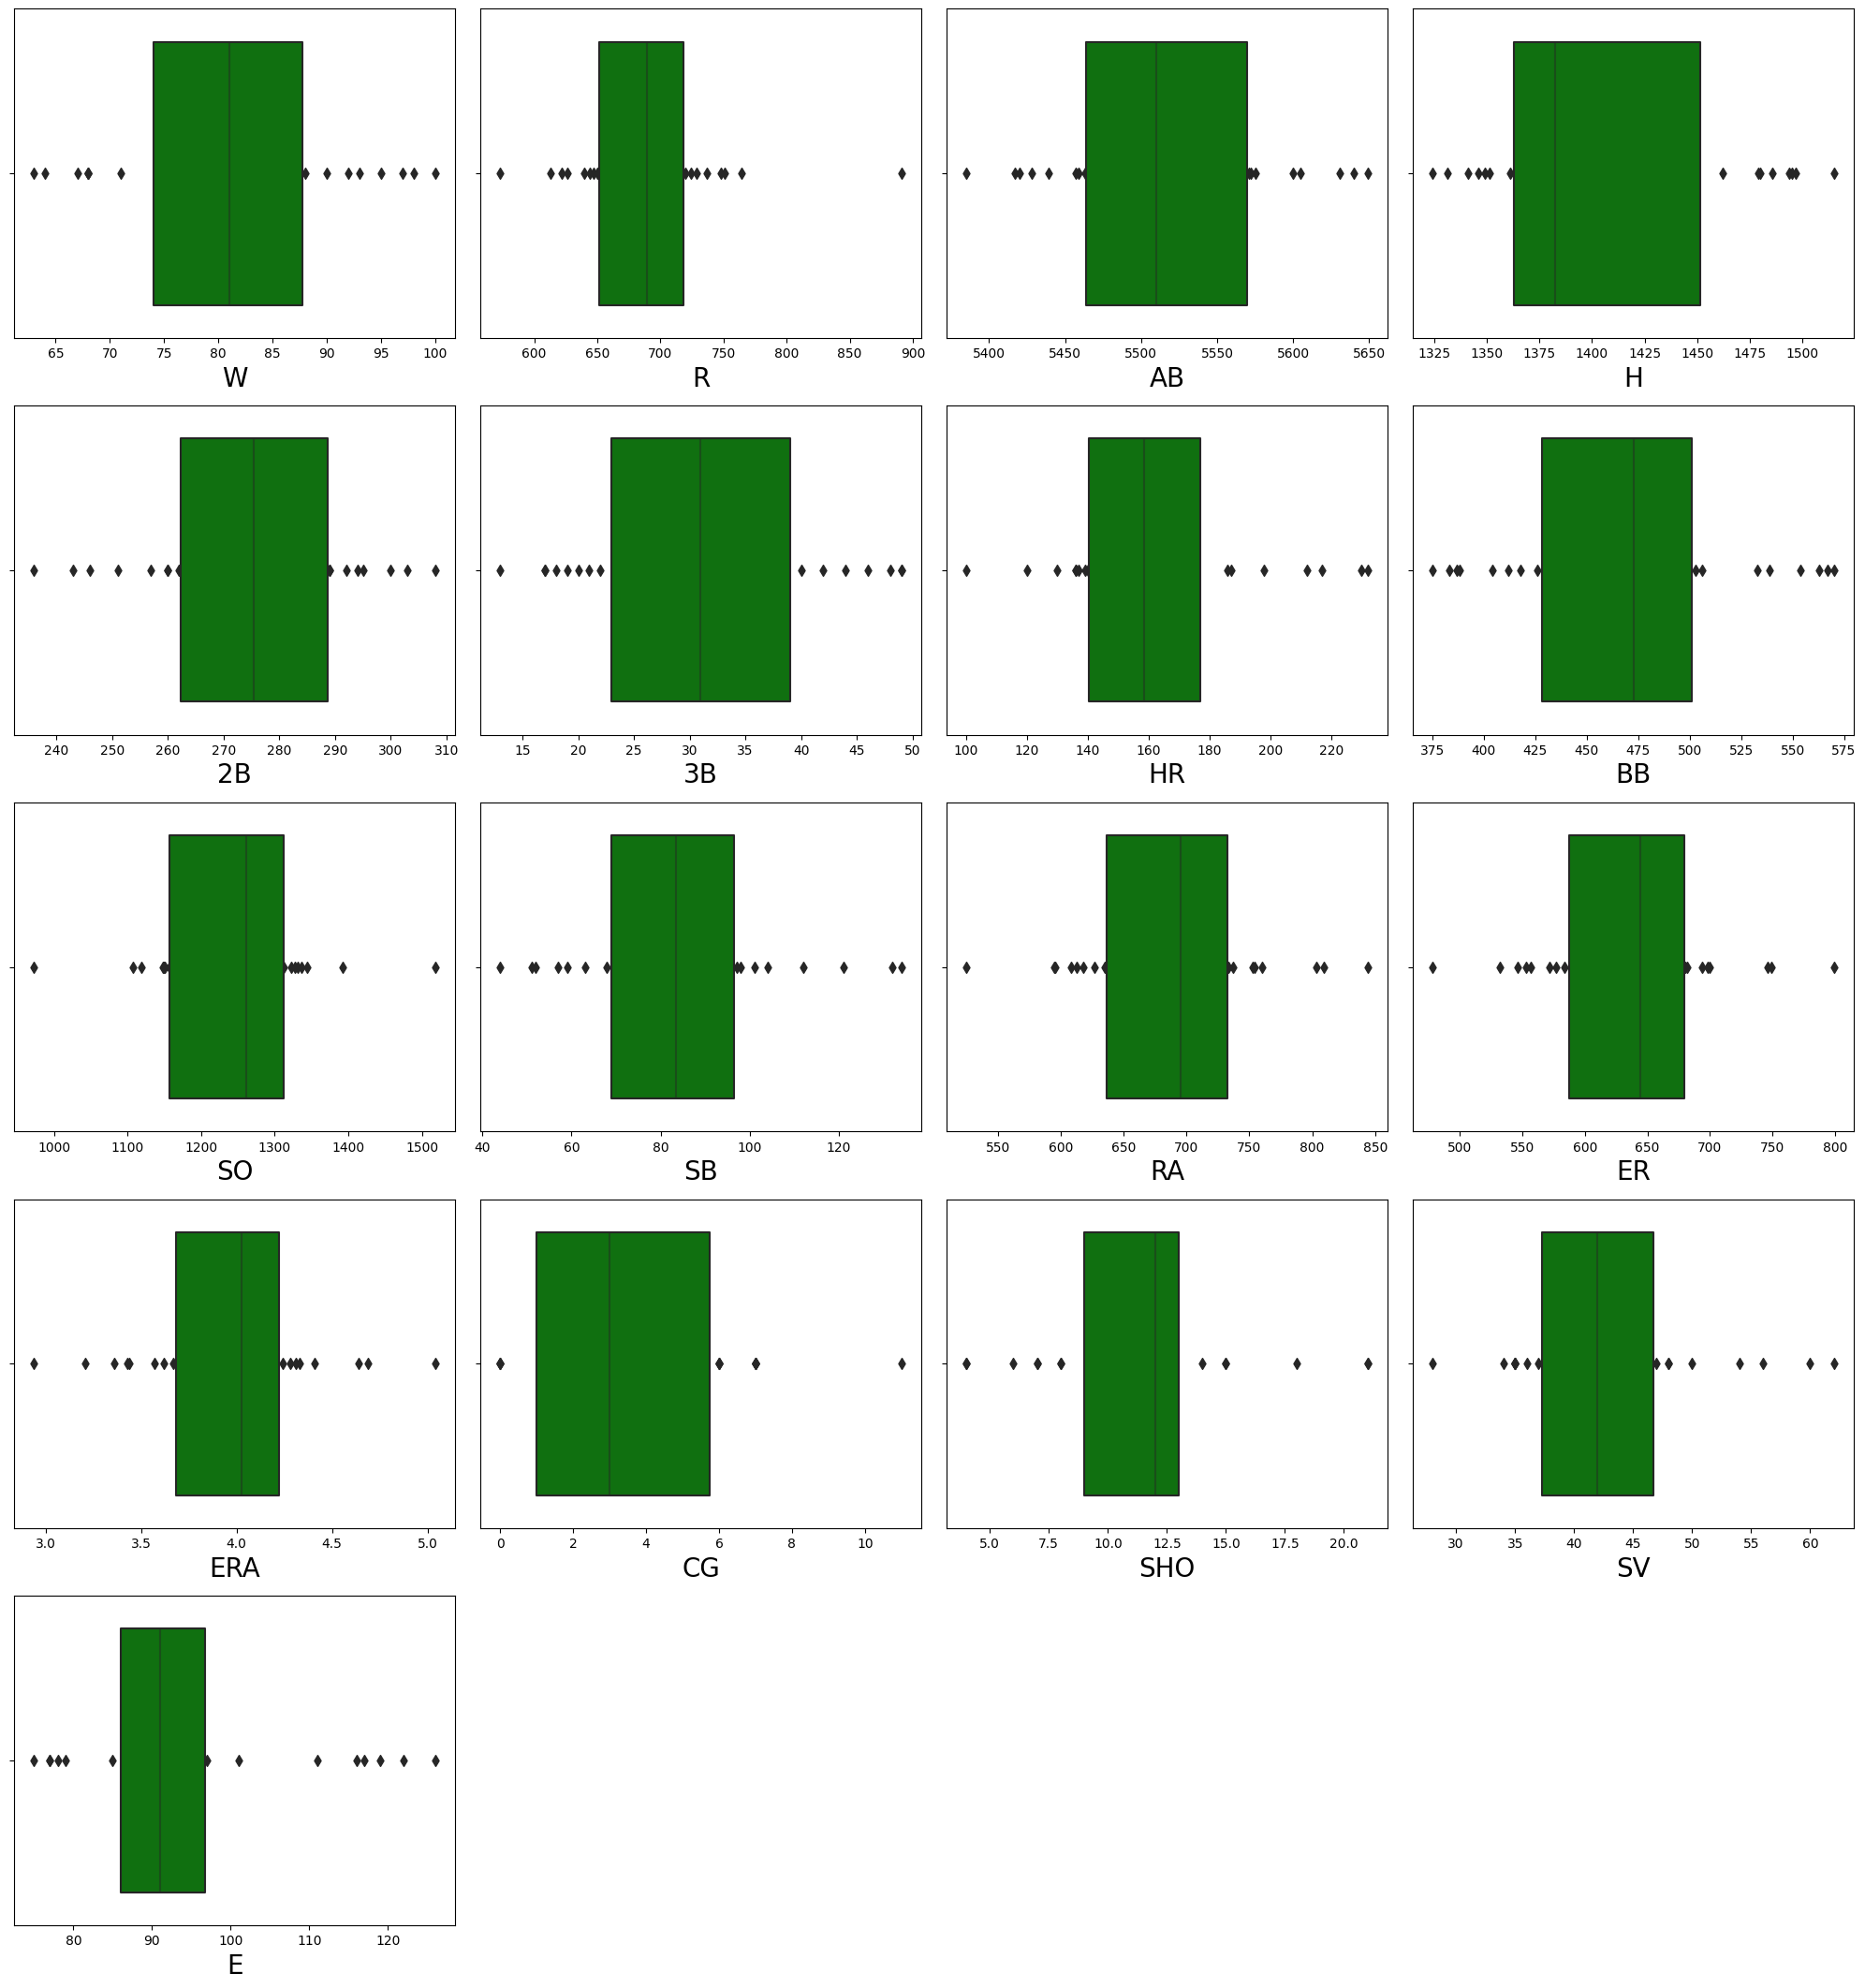

In [24]:
plt.figure(figsize=(20,25),facecolor='white')
p=1

for col in df:
    
    if p<=17:
        axs=plt.subplot(6,4,p)
        sns.boxenplot(x=df[col],color='green')
        plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()
plt.show()

In [4]:
x=df.drop('W',axis=1)
y=df['W']

In [5]:
# Removing the oouliars using the Z score method

from scipy.stats import zscore

z=np.abs(zscore(x))
z

R        AB         H        2B        3B        HR        BB  \
0   0.619078  0.847731  1.663685  1.420173  1.041193  0.787299  1.534902   
1   0.134432  0.711094  0.970681  0.127403  1.235809  0.243967  0.536592   
2   0.332906  1.115233  0.151891  1.588795  0.223808  0.723377  1.139144   
3   1.146419  0.241522  0.401088  0.828122  0.418423  0.883181  1.160536   
4   0.013270  1.280738  1.984081  0.801892  1.722347  0.403770  0.251360   
5   3.509647  0.104884  1.361089  1.869832  1.391501  2.185047  1.798742   
6   1.311430  0.732263  0.116292  0.153633  1.196885  1.545833  1.513510   
7   0.428681  0.451289  0.596886  1.615025  1.099578  1.705636  0.910958   
8   0.765626  0.451289  0.365489  0.183611  0.068115  0.107601  0.590073   
9   1.034489  1.785913  1.628086  1.082929  0.165423  0.084163  0.158660   
10  1.086415  0.076017  0.275303  0.239818  0.068115  0.267405  0.604334   
11  0.705622  0.826562  0.721484  0.183611  0.515731  2.121125  0.301276   
12  0.471376  1.432772  1.291077  1.783647  1.002270  0.395247  0.607900   
13  0.557920  0.400291  0.436688  0.715707  0.904962  1.098383  0.158660   
14  0.099814  1.208570  0.026106  0.127403  1.430424  0.563574  0.105179   
15  0.713699  0.465723  0.312089  0.745685  0.749270  0.851220  0.657815   
16  0.151740  1.656011  1.040693  0.970514  0.418423  0.755338  0.144398   
17  0.013270  0.364688  1.113079  0.153633  0.126500  0.235444  1.745261   
18  0.575229  0.523457  0.454487  0.041219  0.262731  0.595534  1.017920   
19  0.834861  0.789997  0.383288  0.996744  0.418423  0.107601  0.479546   
20  0.090583  0.154920  0.935081  1.139136  1.391501  0.427208  0.336930   
21  0.255593  1.274002  0.721484  0.547085  1.780732  0.427208  1.246105   
22  1.302198  0.768828  0.293103  2.177099  0.846578  1.394552  1.677518   
23  1.994550  1.389471  0.757084  1.333988  1.294193  2.033766  0.033871   
24  1.077184  0.183787  0.525687  0.153633  0.554654  1.074945  1.463595   
25  0.367523  1.894646  1.024080  0.659500  0.515731  0.746815  1.673953   
26  0.134432  0.703396  1.467888  0.745685  0.749270  0.883181  0.215706   
27  0.549843  1.915815  1.610286  0.801892  1.625040  0.307888  0.372584   
28  0.661773  0.855429  1.415675  0.828122  0.457346  0.499652  0.768343   
29  0.844092  0.804431  1.343289  0.041219  1.722347  0.714854  1.445768   

          SO        SB        RA        ER       ERA        CG       SHO  \
0   2.697630  0.913883  0.666234  0.505110  0.506955  0.539806  0.814629   
1   0.154878  0.601826  0.165971  0.248930  0.254598  0.539806  0.172800   
2   0.893982  0.111449  0.680339  0.751623  0.641347  2.772641  0.320914   
3   0.168602  0.690985  0.180076  0.103922  0.053010  1.300442  0.567771   
4   0.105866  0.022290  1.618803  1.597501  1.531318  1.300442  0.172800   
5   0.952796  0.200609  0.257184  0.389104  0.350165  1.300442  0.320914   
6   0.207812  0.913883  0.137760  0.234429  0.165003  0.171757  1.802057   
7   0.811641  1.760897  0.067235  0.147424  0.209800  1.275906  0.320914   
8   0.605790  0.156029  0.652129  0.461608  0.484557  0.907856  0.172800   
9   0.982204  0.557246  0.913544  0.843461  0.792164  0.171757  0.320914   
10  0.148997  0.780144  0.631441  0.640451  0.635374  0.564343  0.567771   
11  1.409590  1.671738  0.990653  0.925632  0.865333  0.564343  0.419657   
12  0.962599  1.404260  0.186658  0.084588  0.036584  0.539806  0.172800   
13  0.860654  0.646405  0.532705  0.596948  0.456185  0.932393  0.172800   
14  1.266474  0.245188  0.575021  0.408438  0.411388  0.564343  0.913371   
15  0.184286  0.646405  2.302433  2.288705  2.276445  0.907856  0.913371   
16  0.723420  0.646405  1.300966  1.505663  1.671683  1.275906  0.419657   
17  2.644696  0.512666  1.131704  1.302652  1.335704  0.932393  2.394514   
18  0.497964  0.022290  0.687862  0.669452  0.724968  0.907856  1.061486   
19  0.066657  2.251273  0.927650  0.930466  0.836961  0.539806  0.814629   
20  0.409742  1.448839  1.061179  1.143144  1.178913  0.90

In [6]:
df_cleaned=df[(z<3).all(axis=1)]


In [7]:
df_cleaned = df_cleaned[df_cleaned['W'].notnull()]

print(df_cleaned.shape)

(29, 17)


In [8]:
print('Data Loss percentage: ' ,((df.shape[0]-df_cleaned.shape[0])/df.shape[0])*100)
  # precentage should not more than 10% other wise we have to use another method to remove outliars or something else

Data Loss percentage:  3.3333333333333335


In [9]:
df_cleaned.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [ ]:
# No skewness 

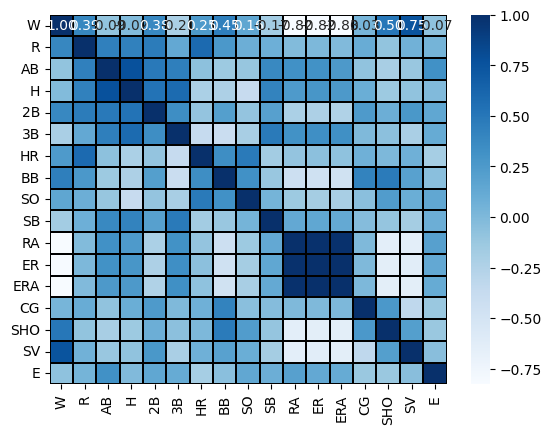

In [14]:
sns.heatmap(df_cleaned.corr(), annot=True,cmap='Blues',linewidths=0.01,linecolor='black',fmt='.2f')
plt.yticks(rotation=0)

plt.show()

In [17]:
df_cleaned.corr()

W         R        AB         H        2B        3B        HR  \
W    1.000000  0.390451 -0.085780 -0.018360  0.384886 -0.206737  0.245697   
R    0.390451  1.000000  0.438022  0.433525  0.469293  0.134204  0.586894   
AB  -0.085780  0.438022  1.000000  0.769159  0.490752  0.445604 -0.064653   
H   -0.018360  0.433525  0.769159  1.000000  0.528016  0.582024 -0.218711   
2B   0.384886  0.469293  0.490752  0.528016  1.000000  0.342419 -0.098695   
3B  -0.206737  0.134204  0.445604  0.582024  0.342419  1.000000 -0.369299   
HR   0.245697  0.586894 -0.064653 -0.218711 -0.098695 -0.369299  1.000000   
BB   0.447513  0.258450 -0.137850 -0.222271  0.211243 -0.404852  0.336814   
SO   0.156469  0.081158 -0.111243 -0.371861 -0.096772 -0.196586  0.479914   
SB  -0.169503  0.075323  0.373674  0.417877  0.194308  0.483818 -0.166072   
RA  -0.823176 -0.013858  0.315499  0.244606 -0.215196  0.312750 -0.092586   
ER  -0.815308  0.007727  0.309146  0.280571 -0.224993  0.333731 -0.062094   
ERA -0.826952 -0.009122  0.254872  0.256458 -0.248212  0.325883 -0.070756   
CG   0.029594  0.101438 -0.078511  0.092577  0.244856 -0.003733  0.065978   
SHO  0.497526 -0.085108 -0.198872 -0.135116  0.084060 -0.058896  0.005546   
SV   0.749290  0.061381 -0.113342 -0.079814  0.269999 -0.210627  0.066984   
E   -0.072858  0.043123  0.316297 -0.011945  0.145032  0.108610 -0.189790   

           BB        SO        SB        RA        ER       ERA        CG  \
W    0.447513  0.156469 -0.169503 -0.823176 -0.815308 -0.826952  0.029594   
R    0.258450  0.081158  0.075323 -0.013858  0.007727 -0.009122  0.101438   
AB  -0.137850 -0.111243  0.373674  0.315499  0.309146  0.254872 -0.078511   
H   -0.222271 -0.371861  0.417877  0.244606  0.280571  0.256458  0.092577   
2B   0.211243 -0.096772  0.194308 -0.215196 -0.224993 -0.248212  0.244856   
3B  -0.404852 -0.196586  0.483818  0.312750  0.333731  0.325883 -0.003733   
HR   0.336814  0.479914 -0.166072 -0.092586 -0.062094 -0.070756  0.065978   
BB   1.000000  0.315566 -0.117622 -0.425381 -0.455832 -0.465794  0.417437   
SO   0.315566  1.000000  0.038188 -0.140570 -0.177655 -0.195362 -0.053075   
SB  -0.117622  0.038188  1.000000  0.134315  0.146243  0.128848 -0.030708   
RA  -0.425381 -0.140570  0.134315  1.000000  0.991286  0.986781 -0.005288   
ER  -0.455832 -0.177655  0.146243  0.991286  1.000000  0.997261 -0.002865   
ERA -0.465794 -0.195362  0.128848  0.986781  0.997261  1.000000  0.006038   
CG   0.417437 -0.053075 -0.030708 -0.005288 -0.002865  0.006038  1.000000   
SHO  0.473922  0.231230 -0.104602 -0.641579 -0.637293 -0.637186  0.264346   
SV   0.187101  0.091394 -0.179741 -0.642734 -0.621875 -0.637755 -0.332806   
E   -0.050114  0.142740  0.082702  0.195846  0.131556  0.108191 -0.123447   

          SHO        SV         E  
W    0.497526  0.749290 -0.072858  
R   -0.085108  0.061381  0.043123  
AB  -0.198872 -0.113342  0.316297  
H   -0.135116 -0.079814 -0.011945  
2B   0.084060  0.269999  0.145032  
3B  -0.058896 -0.210627  0.108610  
HR   0.005546  0.066984 -0.189790  
BB   0.473922  0.187101 -0.050114  
SO   0.231230  0.091394  0.142740  
SB  -0.104602 -0.179741  0.082702  
RA  -0.641579 -0.642734  0.195846  
ER  -0.637293 -0.621875  0.131556  
ERA -0.637186 -0.637755  0.108191  
CG   0.264346 -0.332806 -0.123447  
SHO  1.000000  0.214175 -0.121484  
SV   0.214175  1.000000 -0.045539  
E   -0.121484 -0.045539  1.000000

In [18]:
df_cleaned.corr().W.sort_values() # sorted with against target W 

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

In [20]:
df_cleaned.shape

(29, 17)

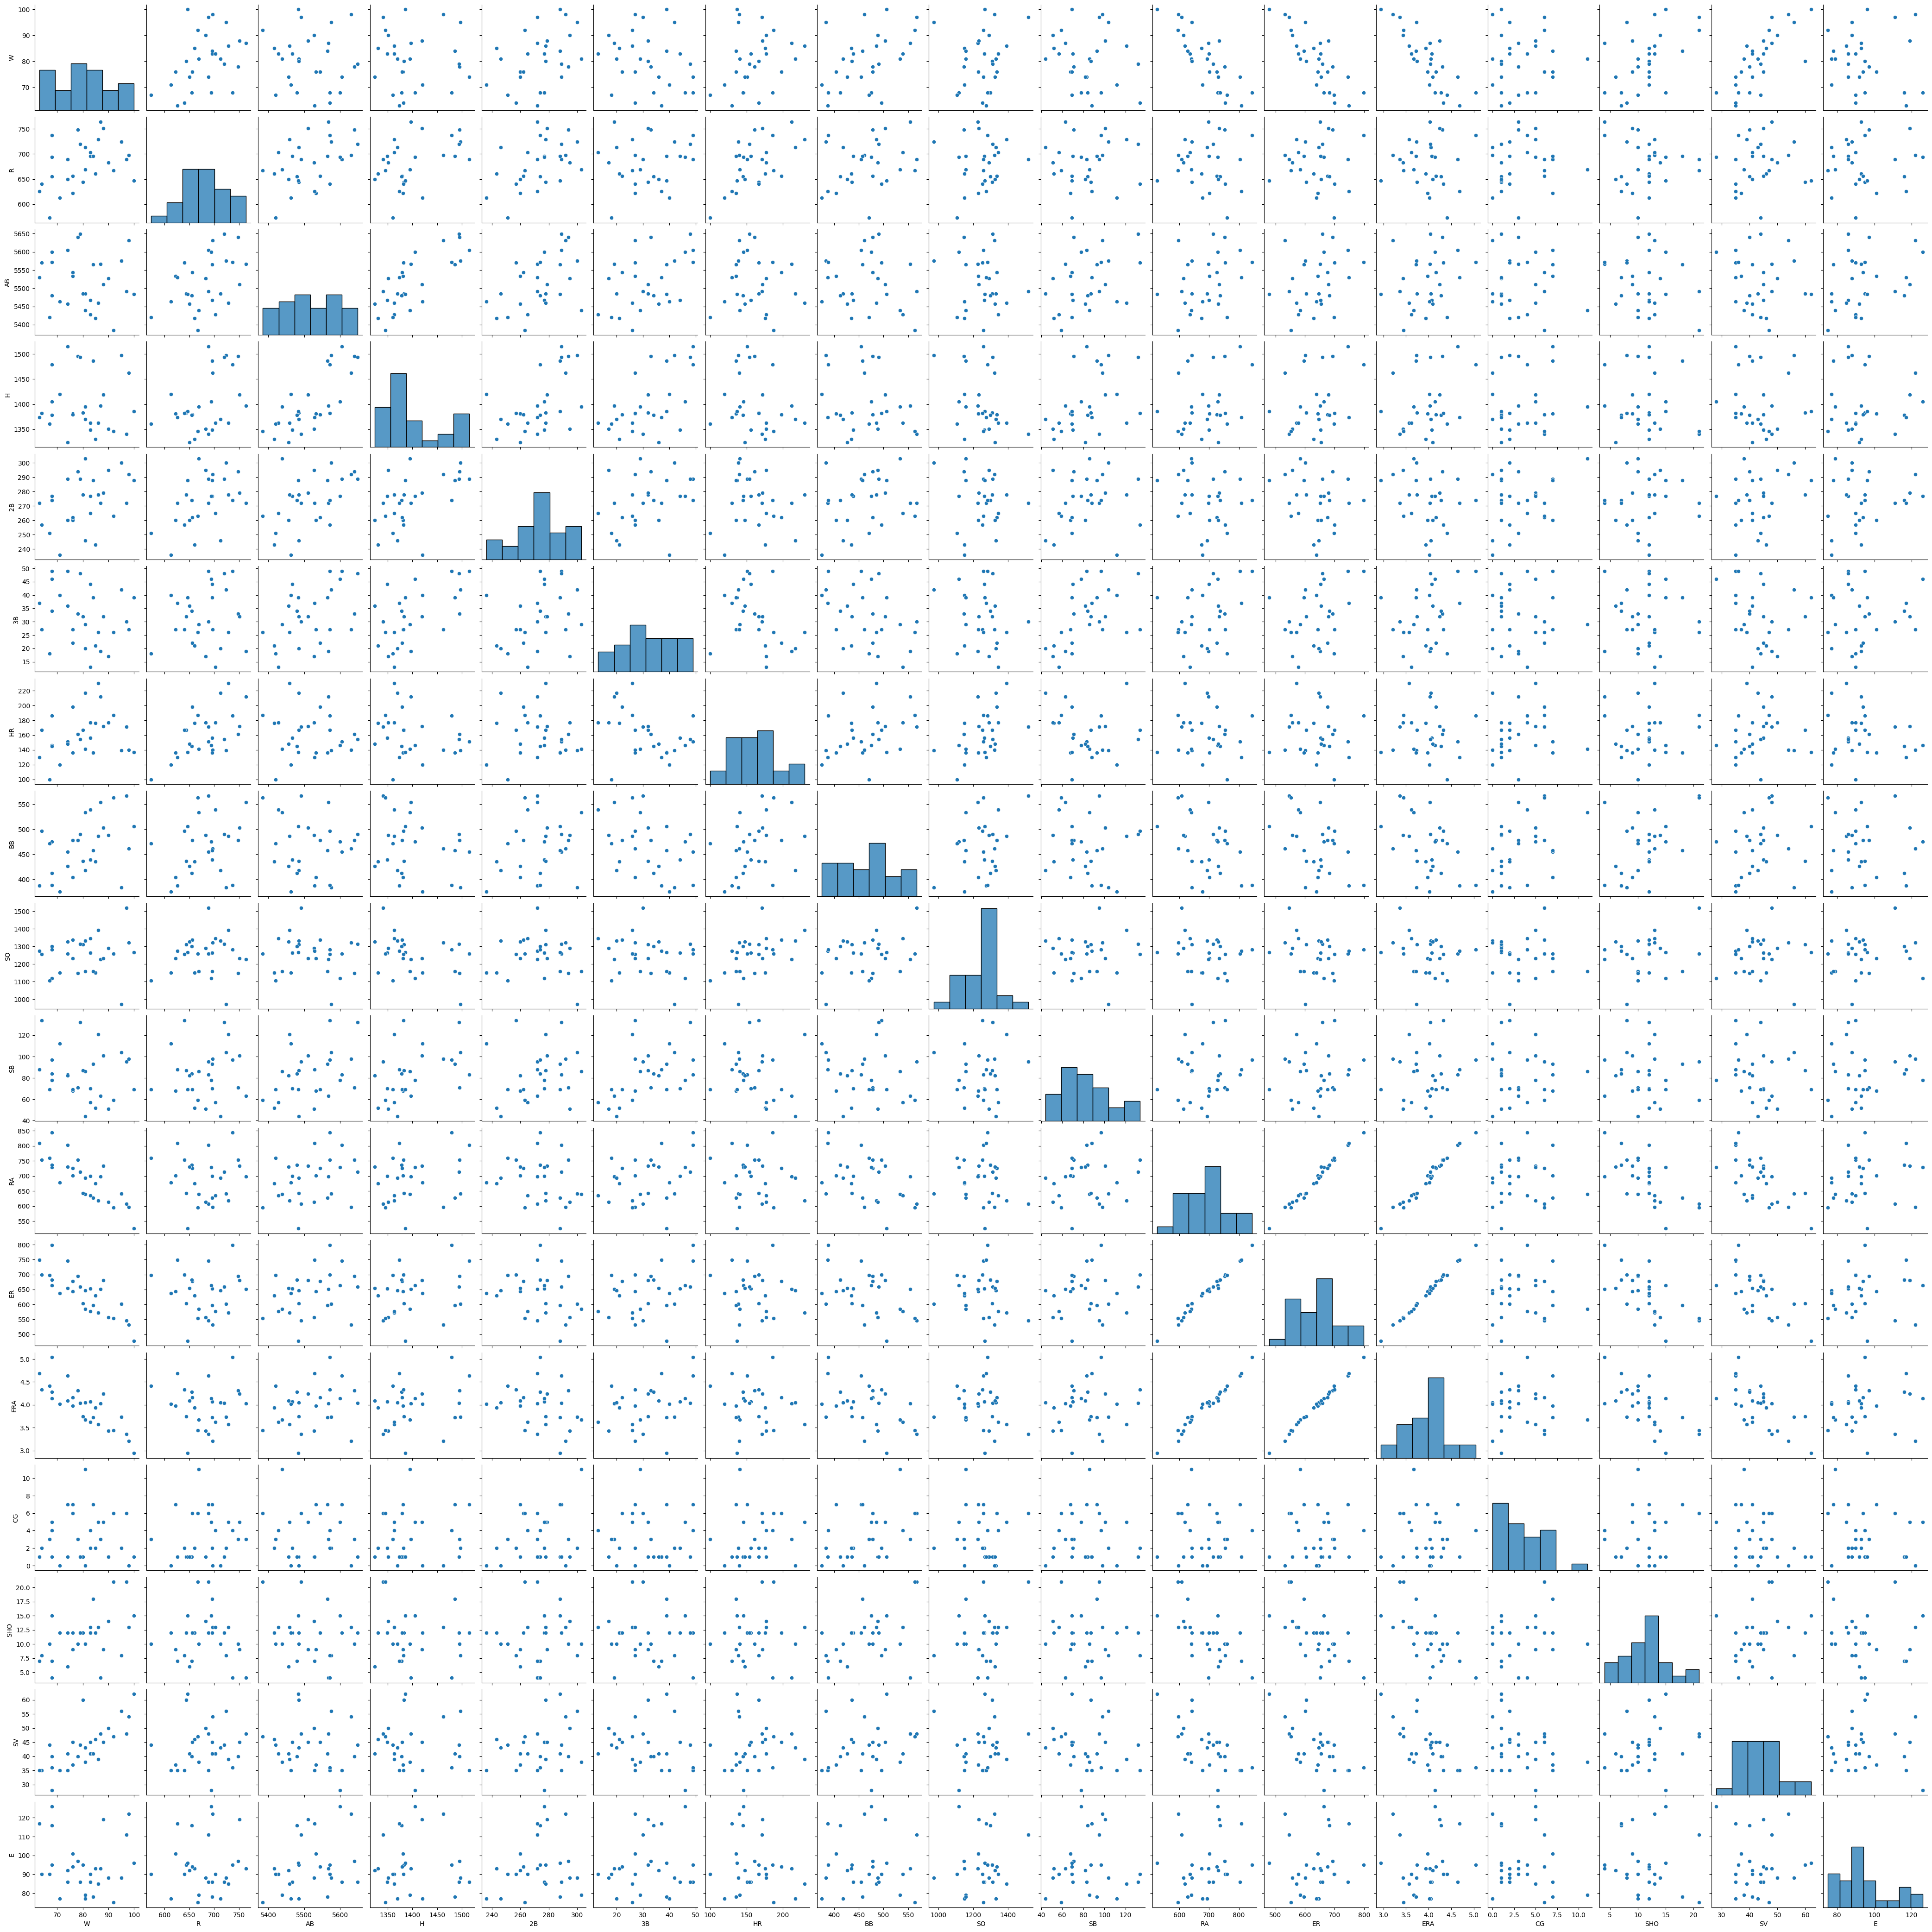

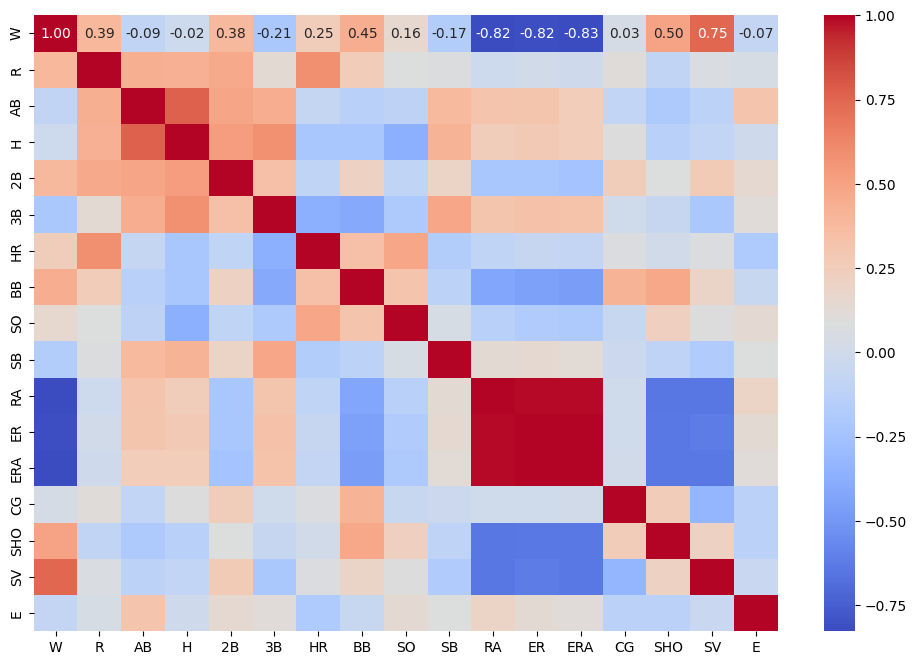

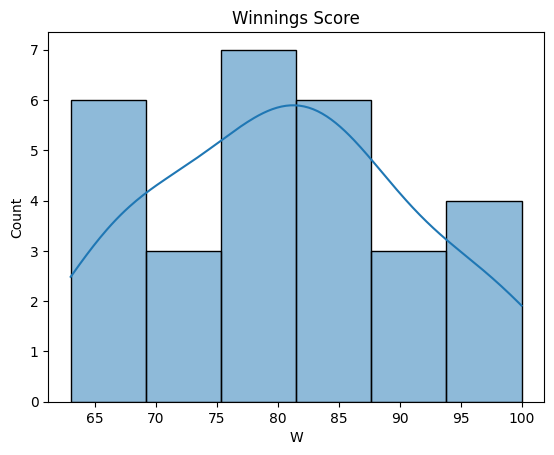

In [21]:
# Pairplot to visualize relationships
sns.pairplot(df_cleaned)
plt.show()

# Correlation matrix
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Distribution of the target variable
sns.histplot(df_cleaned['W'], kde=True)
plt.title('Winnings Score')
plt.show()

In [ ]:
# Model Building 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from  sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

In [23]:
# Creating Train test split

maxAcc=0
maxRS=0
for i in range ( 1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Max r2_scoer: ',maxAcc,'on random state: ',maxRS)


Max r2_scoer:  0.9172122929401217 on random state:  114


In [24]:
# here Max r2_scoer:  0.9641959853281576 which can not be possible in real life. It is may be due to overfitting, data leackage

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

LinearRegression()
R2_Score: 0.9172122929401217
R2 Score on traing data:  0.9445885375503714
Mean absulute error: 2.782006211267137
Mean scuared error: : 10.633621040135473
Root Mean scuared error: : 3.2609233416527093


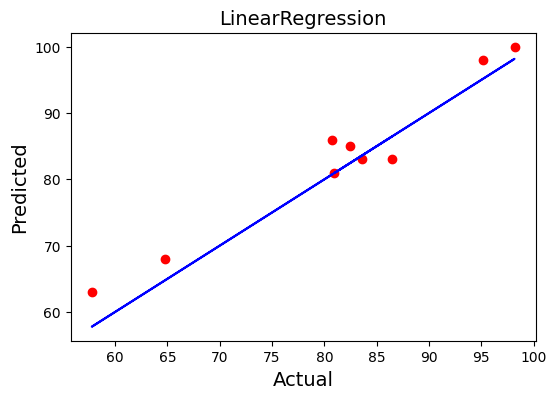

In [25]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
pred_Train=LR.predict(x_train)
print(LR)
print('R2_Score:', r2_score(y_test,predLR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,predLR))
print('Mean scuared error: :', mean_squared_error(y_test,predLR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,predLR)))

plt.figure(figsize=(6,4))
plt.scatter(x=predLR,y=y_test,color='red')
plt.plot(predLR,predLR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('LinearRegression',fontsize=14)
plt.show()

RandomForestRegressor()
R2_Score: 0.5220685121107266
R2 Score on traing data:  0.9155451598794829
Mean absulute error: 6.844444444444445
Mean scuared error: : 61.387644444444454
Root Mean scuared error: : 7.835026767308741


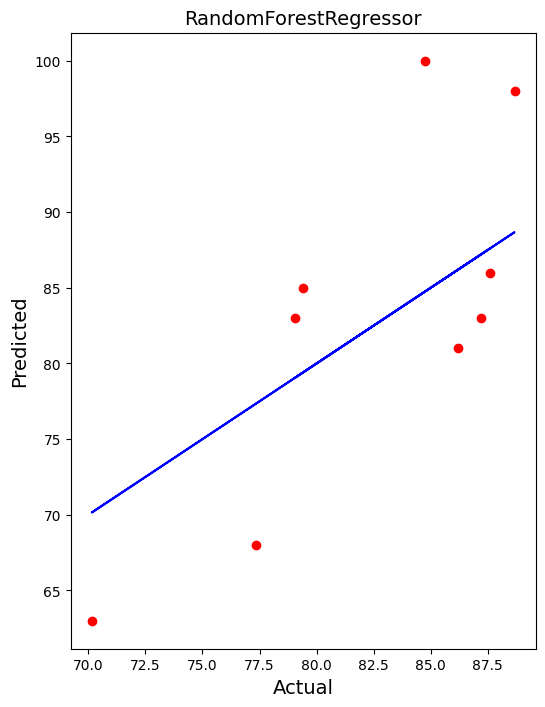

In [26]:
RDF=RandomForestRegressor()
RDF.fit(x_train,y_train)
pred_RDF=RDF.predict(x_test)
pred_Train=RDF.predict(x_train)
print(RDF)
print('R2_Score:', r2_score(y_test,pred_RDF))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_RDF))
print('Mean scuared error: :', mean_squared_error(y_test,pred_RDF))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_RDF)))

plt.figure(figsize=(6,8))
plt.scatter(x=pred_RDF,y=y_test,color='red')
plt.plot(pred_RDF,pred_RDF,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('RandomForestRegressor',fontsize=14)
plt.show()

KNeighborsRegressor()
R2_Score: 0.2722837370242216
R2 Score on traing data:  0.4028195159879483
Mean absulute error: 7.933333333333334
Mean scuared error: : 93.47111111111109
Root Mean scuared error: : 9.668045878620513


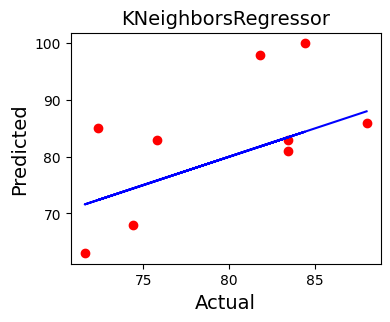

In [28]:
KN=KNN()
KN.fit(x_train,y_train)
pred_KN=KN.predict(x_test)
pred_Train=KN.predict(x_train)
print(KN)
print('R2_Score:', r2_score(y_test,pred_KN))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_KN))
print('Mean scuared error: :', mean_squared_error(y_test,pred_KN))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_KN)))

plt.figure(figsize=(4,3))
plt.scatter(x=pred_KN,y=y_test,color='red')
plt.plot(pred_KN,pred_KN,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=14)
plt.show()

GradientBoostingRegressor()
R2_Score: 0.11336954428099555
R2 Score on traing data:  0.9999998602016569
Mean absulute error: 9.826265235667703
Mean scuared error: : 113.88275631235213
Root Mean scuared error: : 10.671586400922411


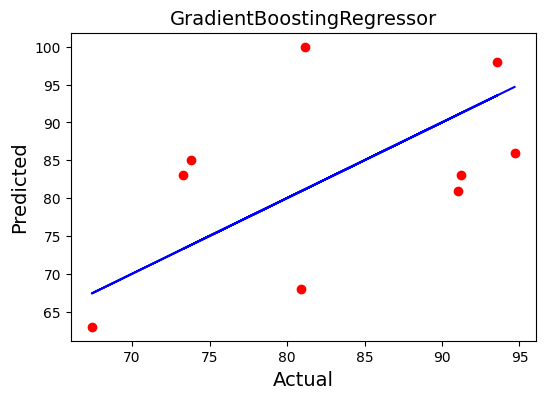

In [29]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_Train=GBR.predict(x_train)
print(GBR)
print('R2_Score:', r2_score(y_test,pred_GBR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_GBR))
print('Mean scuared error: :', mean_squared_error(y_test,pred_GBR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_GBR)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_GBR,y=y_test,color='red')
plt.plot(pred_GBR,pred_GBR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=14)
plt.show()

Lasso()
R2_Score: 0.8996909220829847
R2 Score on traing data:  0.9326372791086798
Mean absulute error: 3.180411071923426
Mean scuared error: : 12.884143785785513
Root Mean scuared error: : 3.5894489529432665


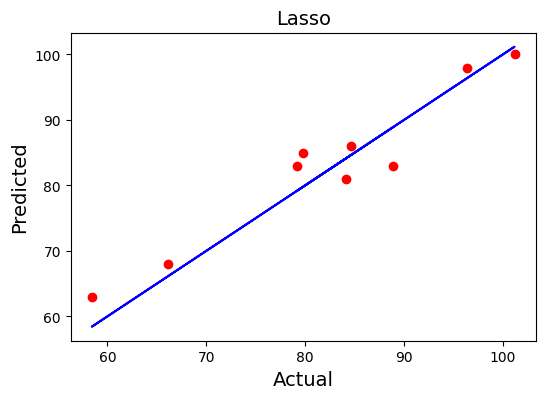

In [30]:
LS=Lasso()
LS.fit(x_train,y_train)
pred_LS=LS.predict(x_test)
pred_Train=LS.predict(x_train)
print(LS)
print('R2_Score:', r2_score(y_test,pred_LS))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_LS))
print('Mean scuared error: :', mean_squared_error(y_test,pred_LS))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_LS)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_LS,y=y_test,color='red')
plt.plot(pred_LS,pred_LS,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso',fontsize=14)
plt.show()

Ridge()
R2_Score: 0.8991171791172585
R2 Score on traing data:  0.9430601288253195
Mean absulute error: 3.139685193969893
Mean scuared error: : 12.957837882272134
Root Mean scuared error: : 3.599699693345562


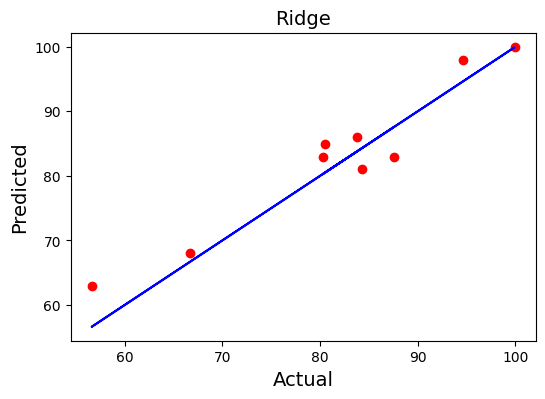

In [31]:
RD=Ridge()
RD.fit(x_train,y_train)
pred_RD=RD.predict(x_test)
pred_Train=RD.predict(x_train)
print(RD)
print('R2_Score:', r2_score(y_test,pred_RD))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_RD))
print('Mean scuared error: :', mean_squared_error(y_test,pred_RD))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_RD)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_RD,y=y_test,color='red')
plt.plot(pred_RD,pred_RD,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge',fontsize=14)
plt.show()

DecisionTreeRegressor()
R2_Score: 0.02249134948096887
R2 Score on traing data:  1.0
Mean absulute error: 10.0
Mean scuared error: : 125.55555555555556
Root Mean scuared error: : 11.205157542647742


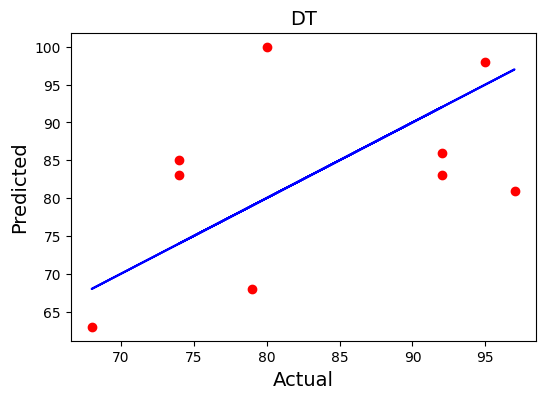

In [32]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
pred_Train=DT.predict(x_train)
print(DT)
print('R2_Score:', r2_score(y_test,pred_DT))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_DT))
print('Mean scuared error: :', mean_squared_error(y_test,pred_DT))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_DT)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_DT,y=y_test,color='red')
plt.plot(pred_DT,pred_DT,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('DT',fontsize=14)
plt.show()

SVR()
R2_Score: -0.12228099971439721
R2 Score on traing data:  -0.011160024395750145
Mean absulute error: 9.988103363043805
Mean scuared error: : 144.15075951887147
Root Mean scuared error: : 12.006280003351224


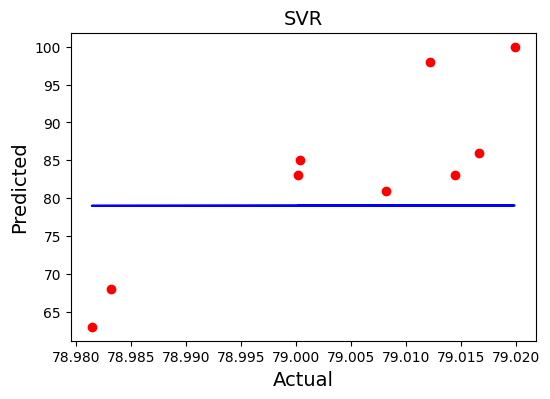

In [33]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_Train=svr.predict(x_train)
print(svr)
print('R2_Score:', r2_score(y_test,pred_svr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_svr))
print('Mean scuared error: :', mean_squared_error(y_test,pred_svr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_svr)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_svr,y=y_test,color='red')
plt.plot(pred_svr,pred_svr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('SVR',fontsize=14)
plt.show()

ExtraTreesRegressor()
R2_Score: 0.576337110726644
R2 Score on traing data:  1.0
Mean absulute error: 6.778888888888886
Mean scuared error: : 54.417144444444396
Root Mean scuared error: : 7.376797709334613


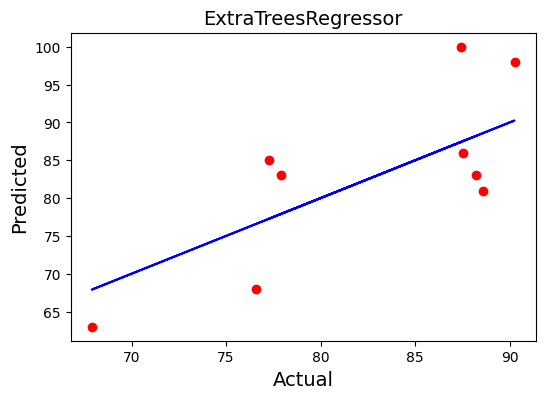

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_Train=etr.predict(x_train)
print(etr)
print('R2_Score:', r2_score(y_test,pred_etr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_etr))
print('Mean scuared error: :', mean_squared_error(y_test,pred_etr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_etr)))

plt.figure(figsize=(6,4))
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=14)
plt.show()

In [35]:
# cross validation

In [36]:
from sklearn.model_selection import cross_val_score


In [37]:
score1=cross_val_score(LR,x,y,cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,predLR)-score1.mean()*100))

[ 0.71136471 -2.21099237  0.38808753  0.73556937  0.5797478 ]
0.04075540667464968
Difference between r2score and cross validation score is:  -3.1583283745248463


In [38]:
score2=cross_val_score(RDF,x,y,cv=5, scoring='r2')
print(score2)
print(score2.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_RDF)-score2.mean()*100))

[ 0.26637131 -4.48636565  0.16677685  0.41846568  0.60732876]
-0.6054846094534597
Difference between r2score and cross validation score is:  61.0705294574567


In [39]:
score3=cross_val_score(KN,x,y,cv=5, scoring='r2')
print(score3)
print(score3.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_KN)-score3.mean()*100))

[-0.52888099 -3.77251908  0.16639756  0.08754788  0.51055621]
-0.7073796844198347
Difference between r2score and cross validation score is:  71.0102521790077


In [40]:
score4=cross_val_score(GBR,x,y,cv=5, scoring='r2')
print(score4)
print(score4.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_GBR)-score4.mean()*100))

[ 0.01014195 -7.08441795  0.2324679   0.33694728  0.58831268]
-1.18330962772291
Difference between r2score and cross validation score is:  118.444332316572


In [42]:
score5=cross_val_score(LS,x,y,cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_LS)-score5.mean()*100))

[ 0.5598312  -0.89631107  0.54411623  0.5306723   0.88070476]
0.3238026856125373
Difference between r2score and cross validation score is:  -31.480577639170743


In [43]:
score6=cross_val_score(DT,x,y,cv=5, scoring='r2')
print(score6)
print(score6.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_DT)-score6.mean()*100))

[-1.19804618 -8.05725191 -0.59824829 -0.26028257  0.36982249]
-1.9488012930595047
Difference between r2score and cross validation score is:  194.90262065543143


In [44]:
score7=cross_val_score(svr,x,y,cv=5, scoring='r2')
print(score7)
print(score7.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_svr)-score7.mean()*100))

[-0.15989899 -0.7621832  -0.31850161 -0.75169003 -0.29872051]
-0.45819886720715275
Difference between r2score and cross validation score is:  45.697605721000876


In [45]:
score8=cross_val_score(etr,x,y,cv=5, scoring='r2')
print(score8)
print(score8.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_etr)-score8.mean()*100))

[ 0.01283401 -5.33080496  0.39555815  0.30511523  0.78761314]
-0.7659368869243626
Difference between r2score and cross validation score is:  77.1700258031629


In [46]:
score9=cross_val_score(RD,x,y,cv=5, scoring='r2')
print(score9)
print(score9.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_RD)-score9.mean()*100))

[ 0.67090465 -2.60020679  0.47831934  0.69410987  0.64922732]
-0.021529122119565636
Difference between r2score and cross validation score is:  3.0520293910738223


In [ ]:
# Lasso is our best model as Difference between r2score and cross validation score is leaset among all

In [49]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10],  # Regularization strength
    'max_iter': [1000, 5000],  # Maximum number of iterations
    'tol': [0.0001, 0.001, 0.01]  # Tolerance for optimization
}

# Create GridSearchCV object
gscv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 10], 'max_iter': [1000, 5000],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='r2')

In [50]:
# Get the best parameters and best score
best_params = gscv.best_params_
best_score = gscv.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation R^2 score: {best_score}")

Best parameters: {'alpha': 10, 'max_iter': 1000, 'tol': 0.01}
Best cross-validation R^2 score: 0.030527925547606815


In [52]:
Model=Lasso(alpha= 10,max_iter= 1000,tol= 0.01)
Model

Lasso(alpha=10, tol=0.01)

In [53]:
Model.fit(x_train,y_train)
pred_Model=Model.predict(x_test)

print('R2_Score:', r2_score(y_test,pred_Model))

print('Mean absulute error:', mean_absolute_error(y_test,pred_Model))
print('Mean scuared error: :', mean_squared_error(y_test,pred_Model))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_Model)))

R2_Score: 0.8849345609288644
Mean absulute error: 3.4704184968580045
Mean scuared error: : 14.779516396248084
Root Mean scuared error: : 3.8444136609173687


In [54]:
import joblib 

In [56]:
import pickle
filename='Basket Ball.pk'
pickle.dump(Model,open(filename,'wb')) #saved the Model

In [57]:
loaded_Model=pickle.load(open('Basket Ball.pk','rb'))
result=loaded_Model.score(x_test,y_test)
print(result*100)


88.49345609288643


In [58]:
conculusion=pd.DataFrame([loaded_Model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conculusion

0          1          2          3          4         5  \
Predicted  88.778566  79.694309  79.649795  84.323807  92.935694   98.2846   
Original   83.000000  83.000000  85.000000  81.000000  98.000000  100.0000   

                   6          7          8  
Predicted  61.725248  66.723918  90.144958  
Original   63.000000  68.000000  86.000000